<img src="estratek_logo.jpg" style="width:543px;height:190px"/>

<img src="wine-tasting.jpeg" style="width:543px;height:190px"/>

# Wine Quality Predictor

This project compares different optimized machine learning models (supervised learning) to predict red and white wine quality rating based on physical-chemical properties.

####  Data Source:
    - URL: https://data.world/joegr/winedata
    - Number of Instances: red wine - 1599; white wine - 4898.
    - Number of Attributes: 11 + output attribute
    - Attribute information:
        - Input variables (based on physicochemical tests):
             1 - fixed acidity
             2 - volatile acidity
             3 - citric acid
             4 - residual sugar
             5 - chlorides
             6 - free sulfur dioxide
             7 - total sulfur dioxide
             8 - density
             9 - pH
            10 - sulphates
            11 - alcohol
        - Output variable (based on sensory data):
            12 - quality (score between 0 and 10 - top quality)


#### ML Models compared:
    - Logistic Regression
    - KNN
    - Decision Trees
    - Random Forest
    - SVM
    - XGBoost



## I. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline

## II. Get the Data

##### About this dataset

It hast 6497 wines samples (red and white), with measures of 12 property variables:

- Fixed acidity refers to the presence of acids in wine that are stable and do not easily evaporate.
- Volatile acidity, on the other hand, represents the amount of acetic acid in wine.
- Citric acid occurs in small quantities in wine and can contribute a refreshing flavor.
- Residual sugar refers to the amount of sugar remaining in wine after the fermentation process is complete.
- Chlorides represent the amount of salt present in wine.
- Free sulfur dioxide refers to the form of SO2 that exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion.
- Total sulfur dioxide represents the combined amount of free and bound forms of SO2.
- Density refers to the density of wine, which is often close to that of water and varies based on the alcohol and sugar content.
- pH is a measurement that describes the acidity or basicity of wine on a scale ranging from 0 (very acidic) to 14 (very basic).
- Sulphates are wine additives that contribute to the levels of sulfur dioxide gas (SO2), which acts as an antimicrobial agent.
- Alcohol content represents the percentage of alcohol in the wine.

and the output variable:

- Quality: scoring from 0 to 9, representing the quality level determined through sensory evaluation.

In [2]:
this_epic = 'Full dataset with Oversampling'

In [3]:
wines = pd.read_csv('wines_es_stddelim.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


- Split the dataset into red and white wines for future use.

In [5]:
red_wines = wines[wines['type']=='red'].drop(['type'], axis=1).reset_index().drop('index', axis=1)
white_wines = wines[wines['type']=='white'].drop(['type'], axis=1).reset_index().drop('index', axis=1)


In [6]:
# Cantidad de vinos por tipo

print(wines.type.value_counts())
print(wines.info())

type
white    4898
red      1599
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

In [7]:
red_wines.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [8]:
white_wines.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


## III. Data Preprocessing and Exploratory Analysis

1. Check for null values
2. Encode categorical features
3. Check and handle duplicates
4. Remove or impute null values
4. Scale features (Standard Scaling)
5. Describe the data
6. Visualize the data
7. Data Analysis Conclusions

##### 1. Check for null values

In [9]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


##### 2. Check and handle duplicates

In [10]:
wines.shape

(6497, 13)

In [11]:
duplicates = wines[wines.duplicated()]
print(duplicates.count())

fixed acidity           1177
volatile acidity        1177
citric acid             1177
residual sugar          1177
chlorides               1177
free sulfur dioxide     1177
total sulfur dioxide    1177
density                 1177
pH                      1177
sulphates               1177
alcohol                 1177
quality                 1177
type                    1177
dtype: int64


In [12]:
wines.drop_duplicates(inplace=True)

In [13]:
wines.shape

(5320, 13)

##### 3. Encode categorical features

- The only categorical feature is 'type', with only two possible values: 'white' and 'red'

In [14]:
cat_feats = ['type']
encoded_wines = pd.get_dummies(wines,columns=cat_feats,drop_first=True)
encoded_wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,True
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,False
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [15]:
encoded_wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type_white            5320 non-null   bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 545.5 KB


##### 4. Remove or impute null values
- First we check for NaN or null values.
- We will use SimpleImputer estimator to impute all the mising values at once

In [16]:
# List all the columns with null values
wines[wines.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [17]:
#  Count the null values
null_values = wines.isna().sum().sum()
null_values

0

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
wines_imputed_matrix = imputer.fit_transform(encoded_wines)
imputed_wines = pd.DataFrame(wines_imputed_matrix, columns=encoded_wines.columns)
imputed_wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0,1.0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0,1.0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0,1.0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,1.0
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,0.0
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,0.0
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,0.0
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,0.0


In [19]:
#  Check the null values
null_values = imputed_wines.isna().sum().sum()
null_values

0

##### 5. Scale features (Stadard Scaler)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_wines.drop('quality',axis=1))
scaled_wines_columns = imputed_wines.columns.drop('quality')
scaled_wines = pd.DataFrame(scaled_features, columns=scaled_wines_columns)

##### 6. Describe the Data
1. wines
2. encoded_wines
3. imputed_wines
4. scaled_wines (normalized)
5. X, y

In [22]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [23]:
scaled_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
count,5.320000e+03,5.320000e+03,5.320000e+03,5320.000000,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03
mean,3.419153e-16,-4.273941e-17,4.273941e-17,0.000000,1.282182e-16,4.273941e-17,-8.547883e-17,1.853822e-14,6.197215e-16,-2.136971e-17,7.265700e-16,-1.282182e-16
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-2.588145e+00,-1.570028e+00,-2.164515e+00,-0.988604,-1.293816e+00,-1.630964e+00,-1.904371e+00,-2.504125e+00,-3.146985e+00,-2.092831e+00,-2.149768e+00,-1.707233e+00
25%,-6.177717e-01,-6.784048e-01,-5.334545e-01,-0.721923,-5.070517e-01,-7.884267e-01,-7.065318e-01,-7.875618e-01,-7.150198e-01,-6.902954e-01,-8.848223e-01,-1.707233e+00
50%,-1.630701e-01,-2.623138e-01,-5.772841e-02,-0.521912,-2.628836e-01,-1.143971e-01,3.331010e-02,3.868208e-02,-9.143899e-02,-1.559963e-01,-1.258547e-01,5.857433e-01
75%,3.674151e-01,3.915434e-01,5.539194e-01,0.544812,2.525824e-01,6.158017e-01,6.894794e-01,7.536359e-01,6.568580e-01,4.450903e-01,7.174425e-01,5.857433e-01
max,6.581671e+00,7.346207e+00,9.116989e+00,13.501067,1.503832e+01,1.454575e+01,5.740662e+00,1.498864e+01,4.897208e+00,9.795325e+00,3.668983e+00,5.857433e-01


In [24]:
# Cantidad vinos por nivel de calidad

print(wines.quality.value_counts())

quality
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: count, dtype: int64


In [25]:
# Cantidad de vinos por tipo

print(wines.type.value_counts())

type
white    3961
red      1359
Name: count, dtype: int64


#### 6.5. VIF (Variance Inflation Factor)



VIF determnes the stength of  the correlation between the independent variables
VIF score of an independent variable represents how well the variable is explained by other independent variables

- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF  exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

* Removing columns with high VIF scores can help to reduce multicollinearity and improve the performance of the model.


In [26]:
#'''

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]
vif['Feaatures'] = scaled_wines_columns

# Checking the values...
vif
# '''

,vif,Feaatures
0,5.011108,fixed acidity
1,2.179464,volatile acidity
2,1.665746,citric acid
3,8.421802,residual sugar
4,1.655546,chlorides
5,2.247508,free sulfur dioxide
6,4.032340,total sulfur dioxide
7,20.680740,density
8,2.499302,pH
9,1.565398,sulphates


* No columns have a vif > 5, so we leave it as it is

#### 6.6 Apply Over Sampling Technique

This technique is used to modify the unequal data classes to create balanced datasets.
When the quantity of data is insufficient, the oversampling method tries to balance by incrementing the size of rare samples.

Over sampling techniques for classification problems
    1. Random Oversampling
    2. Synthetic Minority Oversampling Technique (SMOTE)
    3. Adaptive Synthetic Sampling (ADASYN)

We will use SMOTE here.

##### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE works by utilizin K-nearest neigbors algorithm to create synthetic data.
In this technique, the minority class is over-sampled by producing synthetic examples rather than by over-sampling with replacement and for each minority class observation.

In [27]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=4)
# transform the dataset

X = scaled_wines
y = imputed_wines['quality']

X_os, y_os = oversample.fit_resample(X, y)


In [28]:
X_os.shape, y_os.shape

((16261, 12), (16261,))

In [29]:
y.value_counts()

quality
6.0    2323
5.0    1752
7.0     856
4.0     206
8.0     148
3.0      30
9.0       5
Name: count, dtype: int64

In [30]:
y_os.value_counts()

quality
6.0    2323
5.0    2323
7.0    2323
8.0    2323
4.0    2323
3.0    2323
9.0    2323
Name: count, dtype: int64

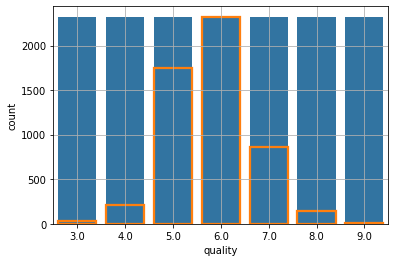

In [31]:
# Observe the data has been balanced

sns.countplot(x=y_os)
sns.countplot(x=y, fill=False)
plt.grid()

#### 6.6 Apply Under Sampling Technique (*** NOT CHOSEN ***)

Unlike oversampling, this technique balances the imbalanced dataset by reducing the size of the class. It is tipically used when there is a lot of data (big datasets).

Undersampling techniques for classification problems
    1. Random undersampling
    2. Near Miss Undersampling
    3. Tomek Link Undersampling

The possible advantage is the reduction in run-time by decreasing the amount of traiining dataset, and also that it helps to solve memory problems.
    
We will use Near Miss here.


In [32]:
from imblearn.under_sampling import NearMiss

nmiss = NearMiss()

# transform the dataset

X = scaled_wines
y = imputed_wines['quality']

X_us, y_us = nmiss.fit_resample(X, y)


In [33]:
X_us.shape, y_us.shape

((35, 12), (35,))

In [34]:
y.value_counts()

quality
6.0    2323
5.0    1752
7.0     856
4.0     206
8.0     148
3.0      30
9.0       5
Name: count, dtype: int64

In [35]:
y_os.value_counts()

quality
6.0    2323
5.0    2323
7.0    2323
8.0    2323
4.0    2323
3.0    2323
9.0    2323
Name: count, dtype: int64

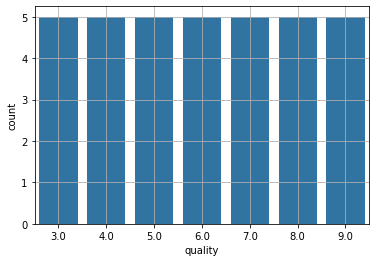

In [36]:
# Observe the data has been balanced

sns.countplot(x=y_us)
# sns.countplot(x=y, fill=False)
plt.grid()

In [37]:
# Selection will be to use Oversampling.  Too few examples for the undersampled dataset

X = X_os
y = y_os

#### 7. Visualize the Data

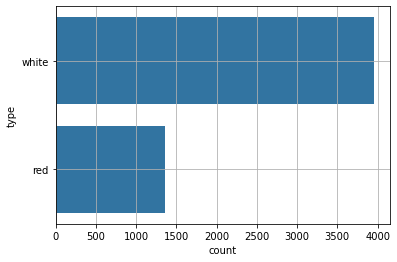

In [38]:
sns.countplot(wines['type'])
plt.grid()
plt.show()

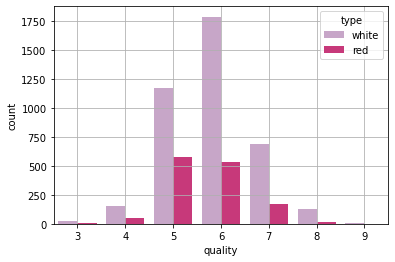

In [39]:
sns.countplot(data=wines, x=wines['quality'], hue='type', palette='PuRd')
plt.grid()
plt.show()

In [40]:
numerical_columns = wines.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()

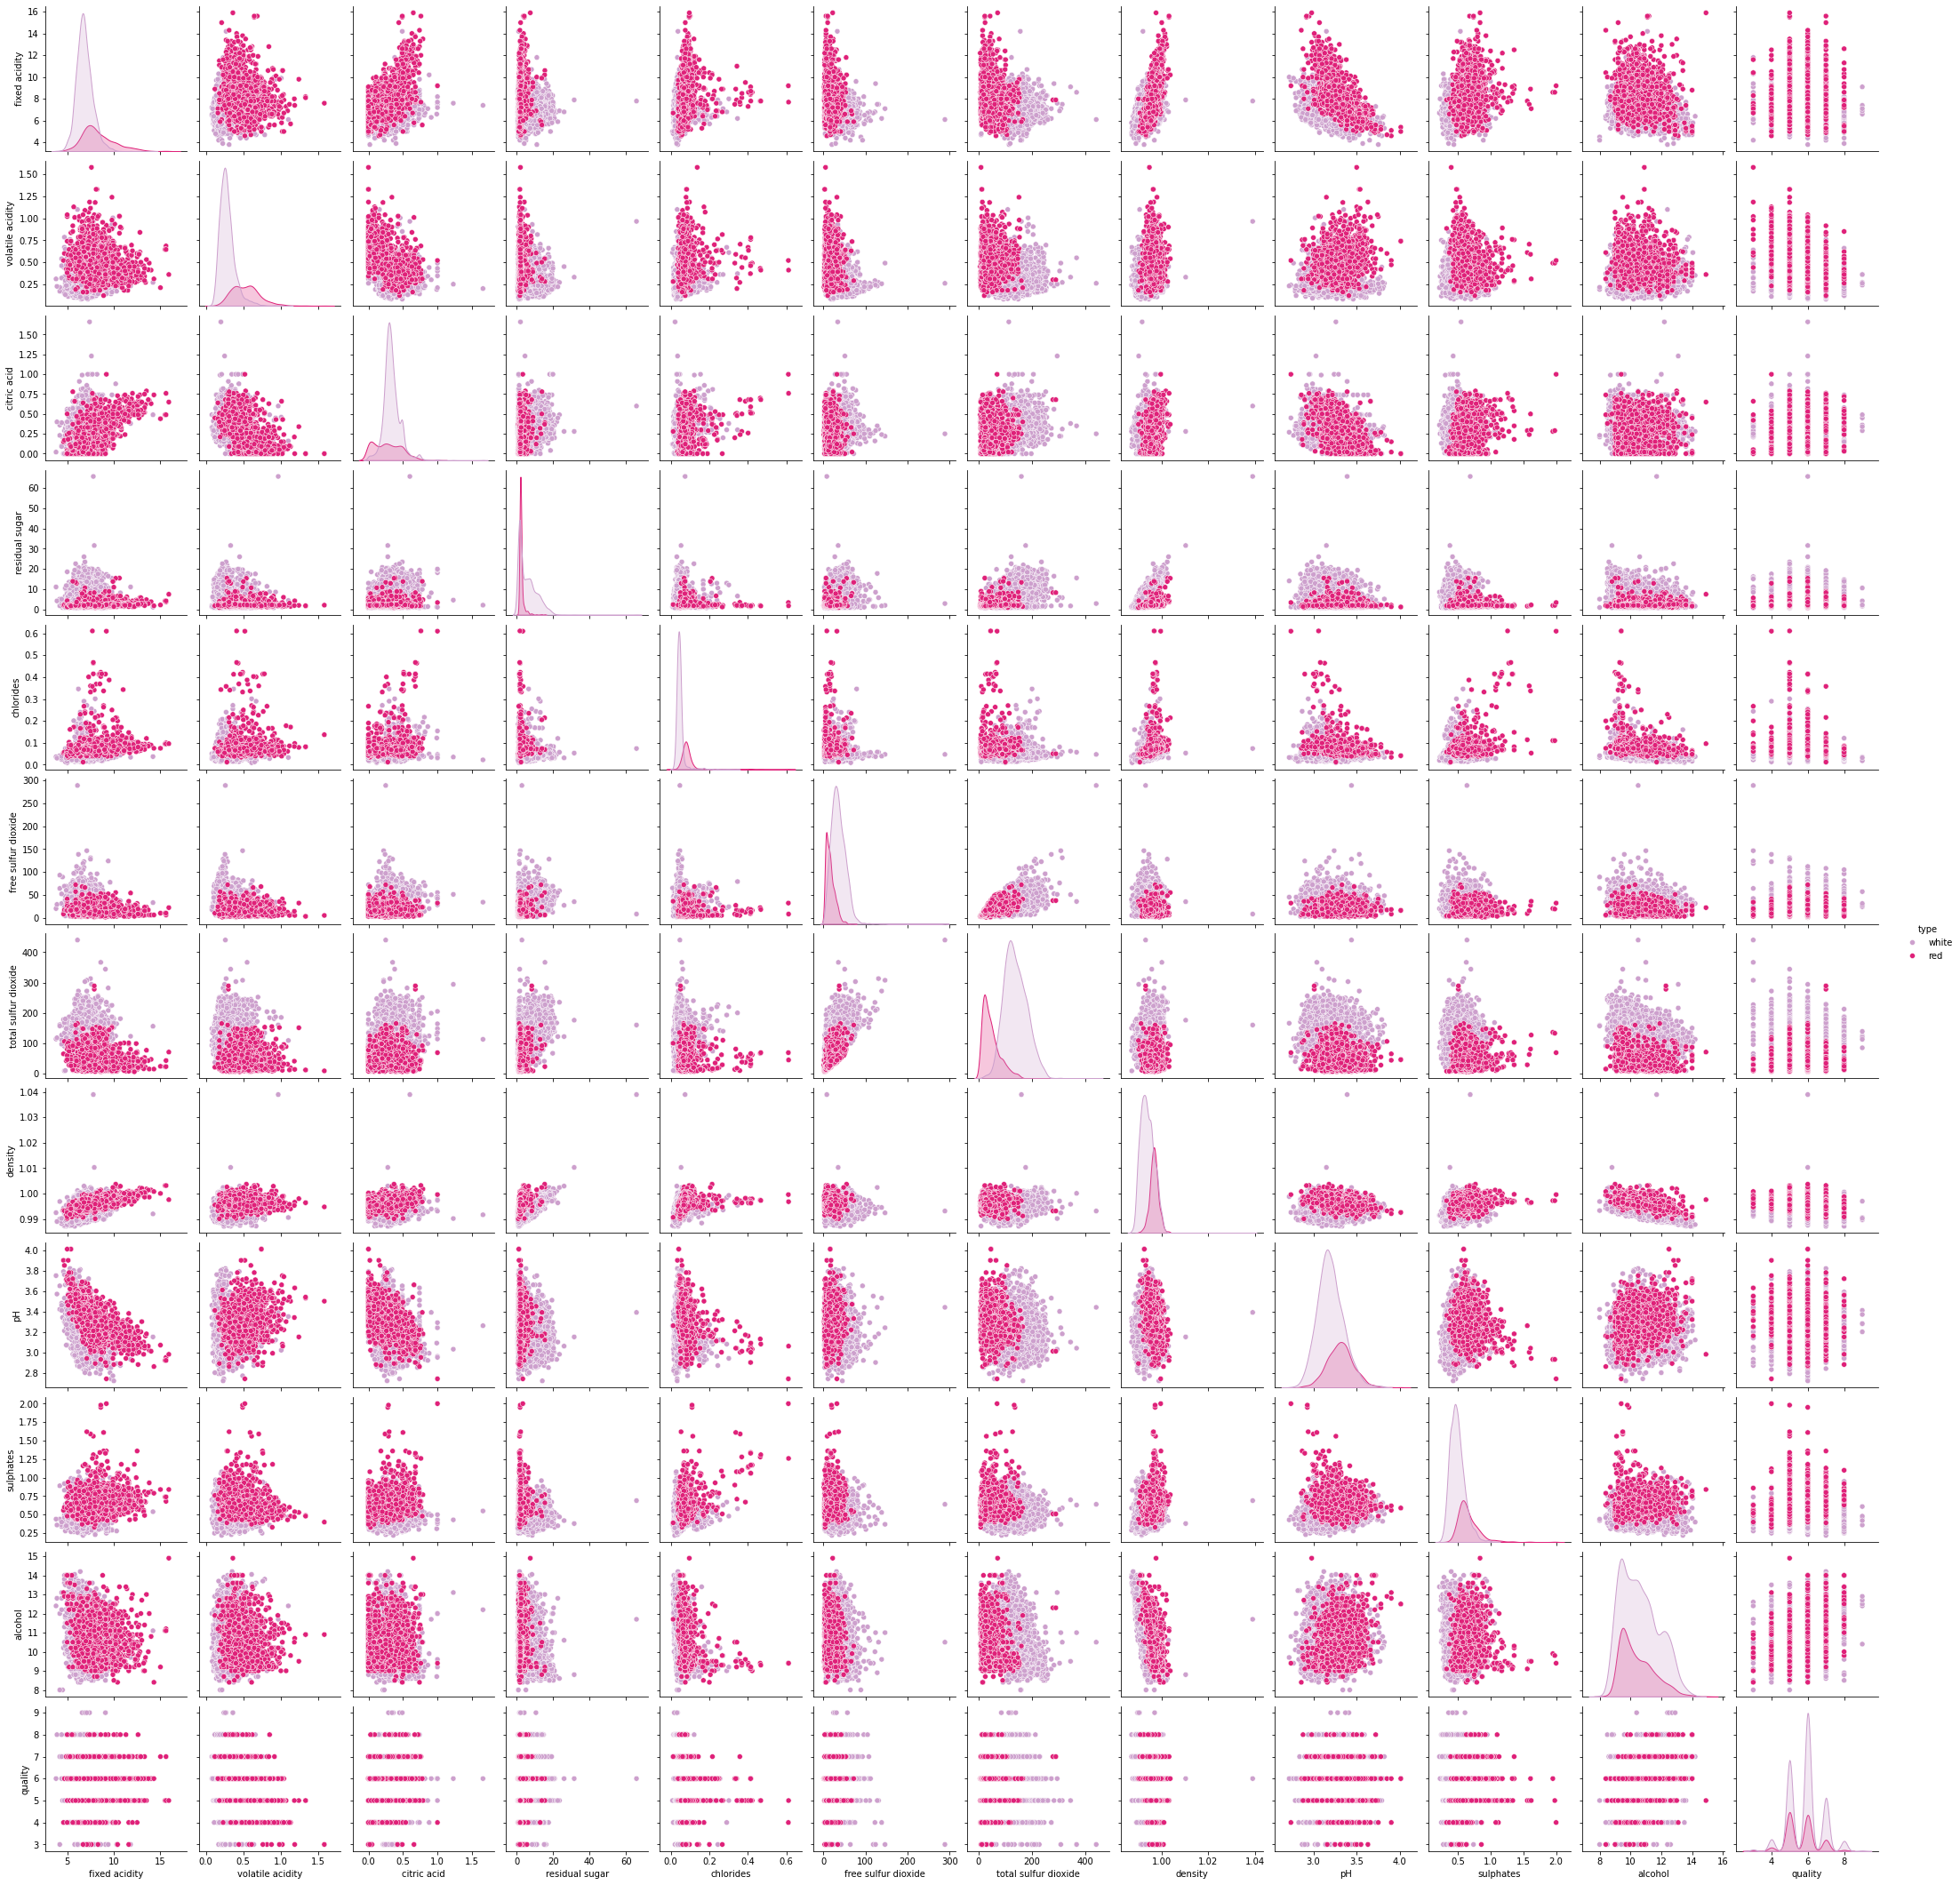

In [41]:
sns.pairplot(wines, hue='type', palette='PuRd')

<AxesSubplot:>

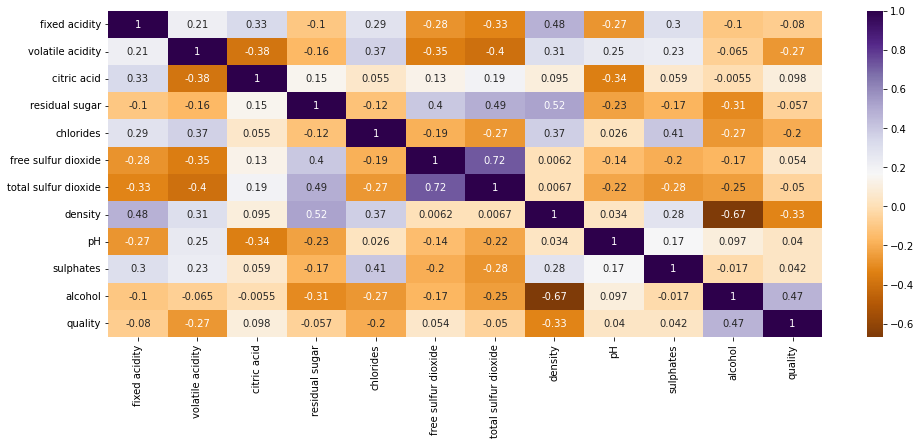

In [42]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, cmap='PuOr', annot=True)

### 8. Red vs. White Wine Data Analysis

<AxesSubplot:>

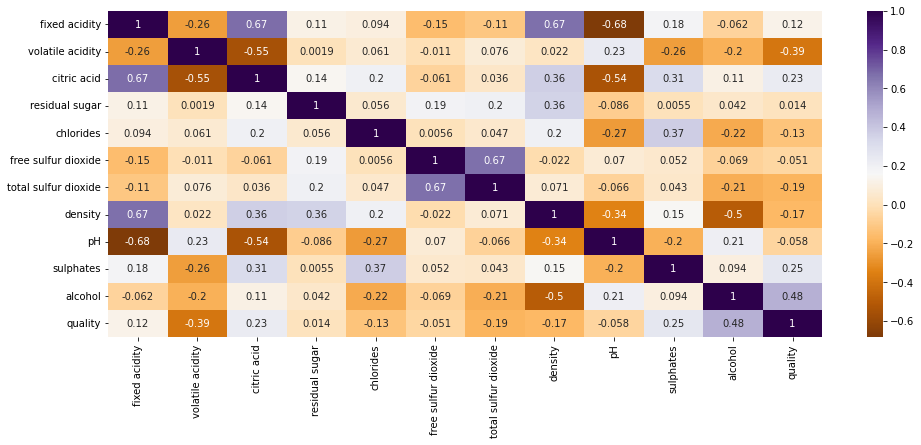

In [43]:
red_corr = red_wines.corr()
plt.figure(figsize=(16,6))
sns.heatmap(red_corr, cmap='PuOr', annot=True)

* The most negatively correlated variable with quality is Volatile Acidity and Sulfur Dioxide.
* The most positively correlated variable with quality is Alcohol

<AxesSubplot:>

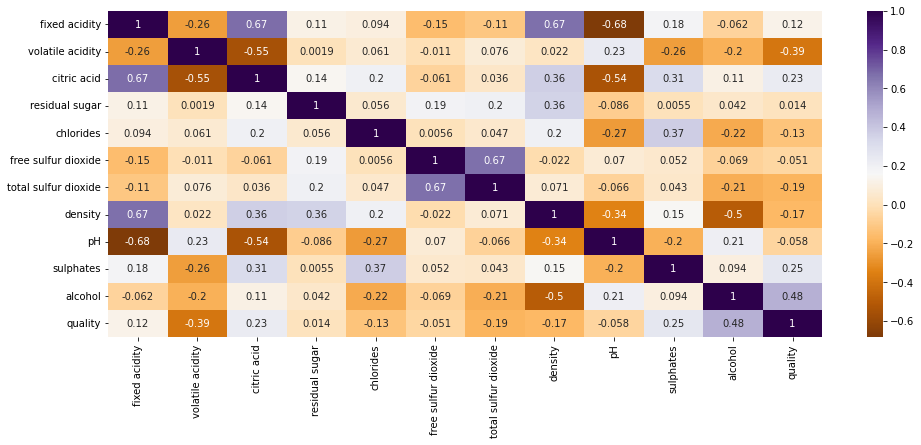

In [44]:
white_corr = white_wines.corr()
plt.figure(figsize=(16,6))
sns.heatmap(red_corr, cmap='PuOr', annot=True)

* Same results as with red wines regarding correlation with quality

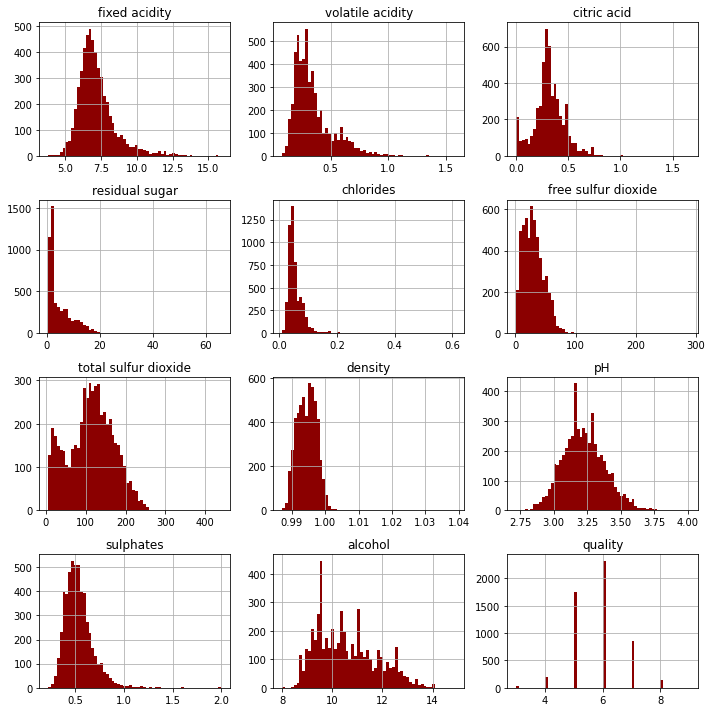

In [45]:
wines.hist(figsize=(10, 10), bins=60, color='darkred')
plt.tight_layout()
plt.show()

In [46]:

# Convert the filtered DataFrames to NumPy arrays before passing to histplot
red_alcohol = np.array(wines[wines['type'] == 'red']['alcohol'])
red_alcohol

array([ 9.4,  9.8,  9.8, ..., 11.2, 10.2, 11. ])

In [47]:
# Convert the filtered DataFrames to NumPy arrays before passing to histplot
white_alcohol = np.array(wines[wines['type'] == 'white']['alcohol'])

white_alcohol

array([ 8.8,  9.5, 10.1, ...,  9.4, 12.8, 11.8])

In [48]:

# Create the histograms
# sns.histplot(data=red_alcohol, alpha=0.4, bins='auto', kde=True, color='red')
# sns.histplot(data=white_alcohol, alpha=0.4, bins='auto', kde=True, color='gray')
# plt.show()


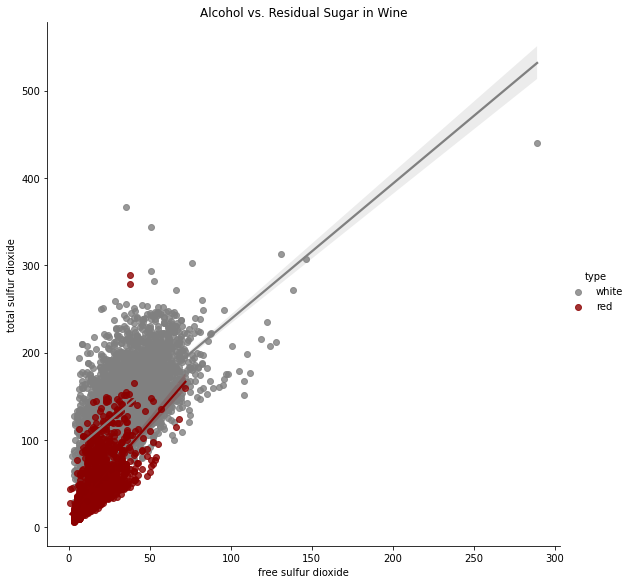

In [49]:
# Create the lmplot
sns.lmplot(
    x='free sulfur dioxide',
    y='total sulfur dioxide',
    # x='alcohol',
    # y='residual sugar',
    data=wines,
    hue='type',
    palette={'white': 'gray', 'red': 'darkred'},
    height=8
)

# Use more informative axis labels than are provided by default
# sns.set_axis_labels("Alcohol level (%)", "Residual Sugar")

# Add a title to the plot
plt.title("Alcohol vs. Residual Sugar in Wine")

# Show the plot
plt.show()

##### CONCLUSIONS

1. Data is unbalanced with the number of samples per quality values
2. WE need to apply data sampling mathods for Imbalanced datasets
3. Methods:
    Oversampling:
    3.1. Random Oversampling
    3.2. Synthetic Minority Oversampling Technique (SMOTE)
    3.3. Adaptive Synthetic Sampling (ADASYN)
    Undersampling:
    3.4. Random under sampling
    3.5. Near Miss Under Sampling
    3.6. Tomek Links Under Sampling
4. We corrected data imbalance using oversampling (SMOTE) technique.


## IV. Model training class definitions

In [50]:
import datetime

class ScoreLogger:
    def __init__(self):
        self.df = pd.DataFrame(columns=['Model', 'Score'])

    def add(self, epic, model, score):
        # Get the now date time
        now_ts = datetime.datetime.now()
        new_row = pd.DataFrame({'Timestamp': [now_ts], 'Epic': [epic], 'Model': [model], 'Score': [score]})
        self.df = pd.concat([self.df, new_row], ignore_index=True)

    def print(self):
        if (len(self.df) == 0):
            print('Nothing to show here.')
        else:
            self.df = self.df.sort_values(by=['Score'], ascending=False)
            print(self.df.to_string())
            print('\n')
            print('Timestamp:',  self.df['Timestamp'].iloc[0])
            print('Best epic:',  self.df['Epic'].iloc[0])
            print('Best model:', self.df['Model'].iloc[0])
            print('Best score:', self.df['Score'].iloc[0])
    def clear(self):
        self.df = pd.DataFrame(columns=['Model', 'Score'])

logger = ScoreLogger()
# logger.clear()

#### Getting all the training source data: X, y, X_train, X_test, y_train, y_test

In [51]:
from sklearn.model_selection import train_test_split

# Uncomment in case you DON'T want to use oversampling or undersampling
# X = scaled_wines
# y = imputed_wines['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101)


In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4878 entries, 11477 to 13151
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4878 non-null   float64
 1   volatile acidity      4878 non-null   float64
 2   citric acid           4878 non-null   float64
 3   residual sugar        4878 non-null   float64
 4   chlorides             4878 non-null   float64
 5   free sulfur dioxide   4878 non-null   float64
 6   total sulfur dioxide  4878 non-null   float64
 7   density               4878 non-null   float64
 8   pH                    4878 non-null   float64
 9   sulphates             4878 non-null   float64
 10  alcohol               4878 non-null   float64
 11  type_white            4878 non-null   float64
dtypes: float64(12)
memory usage: 495.4 KB


In [53]:
y_train.describe()


count    4878.000000
mean        6.044075
std         1.988975
min         3.000000
25%         4.000000
50%         6.000000
75%         8.000000
max         9.000000
Name: quality, dtype: float64

## V. Model Evaluation

### 1. Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200, random_state=101)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
[[ 751  375  146  112   52  128   95]
 [ 266  837  286  158   67   38    0]
 [ 214  285  761  233   94   37    1]
 [ 158  121  370  389  340  193   28]
 [  49   31   89  268  601  511   56]
 [  59   14   43  110  436  909   72]
 [   0    0    0    0    0    0 1600]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.50      0.45      0.48      1659
         4.0       0.50      0.51      0.50      1652
         5.0       0.45      0.47      0.46      1625
         6.0       0.31      0.24      0.27      1599
         7.0       0.38      0.37      0.38      1605
         8.0       0.50      0.55      0.53      1643
         9.0       0.86      1.00      0.93      1600

    accuracy                           0.51     11383
   macro avg       0.50      0.51      0.51     11383
weighted avg       0.50      0.51      0.51     11383



In [56]:
# Check all LogisticRegression hyperparameters

# Get the default parameters
default_parameters = LogisticRegression().get_params()


# Print the default parameters
print('Parameter             Value')
print('-'*30)
for parameter, value in default_parameters.items():
    print(f"{parameter:20}: {value}")

Parameter             Value
------------------------------
C                   : 1.0
class_weight        : None
dual                : False
fit_intercept       : True
intercept_scaling   : 1
l1_ratio            : None
max_iter            : 100
multi_class         : auto
n_jobs              : None
penalty             : l2
random_state        : None
solver              : lbfgs
tol                 : 0.0001
verbose             : 0
warm_start          : False


In [57]:
# Define the hyperparameter grid
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'sag', 'saga'],
    'tol': [0.0001, 0.00001],
    'max_iter': [1000, 2000, 5000],
}

In [58]:
# C A U T I O N !!!     7min process ahead

# Run the model with all the parameter combinations
grid_search = GridSearchCV(log_reg, hyperparameters, cv=5, verbose=3)
# grid_search.fit(X_train, y_train)

In [59]:
# BEST FOUND LOOKING AT THE GRIDSEARCH RUN
# C=10, max_iter=2000, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=   1.7s
# C=1, max_iter=1000, penalty=l1, solver=saga, tol=0.0001;, score=0.497 total time=   1.3s
# C=10, max_iter=5000, penalty=l2, solver=sag, tol=0.0001;, score=0.451 total time=   2.8s
# C=10, max_iter=5000, penalty=l2, solver=sag, tol=0.0001;, score=0.497 total time=   2.6s
# Get the best hyperparameters
# 
# best_hyperparameters = grid_search.best_params_
# print(best_hyperparameters)

# Get the best hyperparameters
# best_hyperparameters = grid_search.best_params_
# print(best_hyperparameters)
# print(grid_search.best_score_)

# Train the model with the best hyperparameters
best_hyperparameters = {'C': 0.15, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.000001}   # Found manually
log_reg.set_params(**best_hyperparameters)

LogisticRegression(C=0.15, max_iter=5000, penalty='l1', random_state=101,
                   solver='saga', tol=1e-06)

In [60]:
log_reg.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
y_pred = log_reg.predict(X_test)
# accuracy = np.mean(y_pred == y_test)

# print('Accuracy:', accuracy)

print ('Score', log_reg.score(X_test, y_test))


Score 0.5104102609154002


Confusion Matrix:
[[ 752  381  137   91   70  113  115]
 [ 266  831  287  152   77   38    1]
 [ 220  296  760  211   96   40    2]
 [ 156  134  377  359  341  199   33]
 [  43   41   93  263  583  506   76]
 [  50   15   48  104  427  925   74]
 [   0    0    0    0    0    0 1600]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.51      0.45      0.48      1659
         4.0       0.49      0.50      0.50      1652
         5.0       0.45      0.47      0.46      1625
         6.0       0.30      0.22      0.26      1599
         7.0       0.37      0.36      0.36      1605
         8.0       0.51      0.56      0.53      1643
         9.0       0.84      1.00      0.91      1600

    accuracy                           0.51     11383
   macro avg       0.49      0.51      0.50     11383
weighted avg       0.49      0.51      0.50     11383



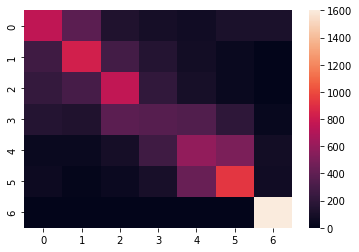

In [61]:
print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))

In [62]:
print('Logistic Regression done!')
logger.add(this_epic, 'LogisticRegression', log_reg.score(X_test, y_test))

Logistic Regression done!


/var/folders/d4/fq7vg26j3cq60g4fsv7_99jc0000gn/T/ipykernel_17619/4112243270.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, new_row], ignore_index=True)


### 2. KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))
# log_reg.score

Confusion Matrix:
[[ 752  381  137   91   70  113  115]
 [ 266  831  287  152   77   38    1]
 [ 220  296  760  211   96   40    2]
 [ 156  134  377  359  341  199   33]
 [  43   41   93  263  583  506   76]
 [  50   15   48  104  427  925   74]
 [   0    0    0    0    0    0 1600]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.51      0.45      0.48      1659
         4.0       0.49      0.50      0.50      1652
         5.0       0.45      0.47      0.46      1625
         6.0       0.30      0.22      0.26      1599
         7.0       0.37      0.36      0.36      1605
         8.0       0.51      0.56      0.53      1643
         9.0       0.84      1.00      0.91      1600

    accuracy                           0.51     11383
   macro avg       0.49      0.51      0.50     11383
weighted avg       0.49      0.51      0.50     11383



#### Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [65]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

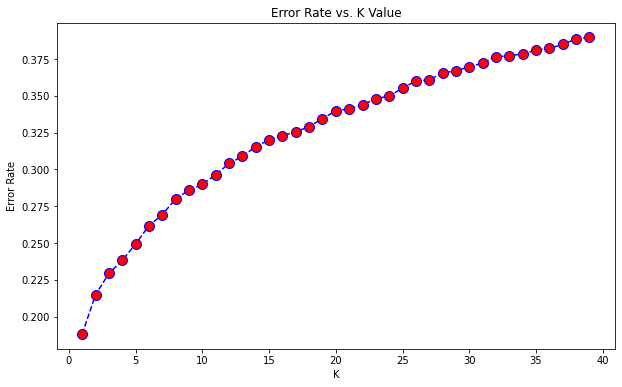

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

* We choose K = 30

In [67]:
# Check all LogisticRegression hyperparameters

# Get the default parameters
default_parameters = KNeighborsClassifier().get_params()


# Print the default parameters
print('Parameter             Value')
print('-'*30)
for parameter, value in default_parameters.items():
    print(f"{parameter:20}: {value}")
    

Parameter             Value
------------------------------
algorithm           : auto
leaf_size           : 30
metric              : minkowski
metric_params       : None
n_jobs              : None
n_neighbors         : 5
p                   : 2
weights             : uniform


In [68]:
# Define the hyperparameter grid
hyperparameters = {
    # 'n_neighbors': [3, 5, 7, 9, 11],
    'n_neighbors': [30],                # Chosen as the best K according to the Elbow chart
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 50, 70, 90, 110],
    'p': [1, 2, 3]
}

In [69]:
# C A U T I O N !!!     5min process ahead

# Run the model with all the parameter combinations
grid_search = GridSearchCV(knn, hyperparameters, cv=5, verbose=3)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=uniform;, score=0.614 total time=   0.4s
[CV 2/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=uniform;, score=0.629 total time=   0.4s
[CV 3/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=uniform;, score=0.618 total time=   0.3s
[CV 4/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=uniform;, score=0.625 total time=   0.2s
[CV 5/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=uniform;, score=0.613 total time=   0.2s
[CV 1/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=distance;, score=0.690 total time=   0.1s
[CV 2/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=distance;, score=0.697 total time=   0.1s
[CV 3/5] END algorithm=auto, leaf_size=30, n_neighbors=30, p=1, weights=distance;, score=0.702 total time=   0.1s
[CV 4/5] END algorithm=auto, l

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=39),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 50, 70, 90, 110],
                         'n_neighbors': [30], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=3)

* Train the model with the best hyper parameters

In [70]:
# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)
print(grid_search.best_score_)

# Train the model with the best hyperparameters
knn.set_params(**best_hyperparameters)


{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
0.6980332072299286


KNeighborsClassifier(n_neighbors=30, p=1, weights='distance')

In [71]:
knn.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
y_pred = knn.predict(X_test)
# accuracy = np.mean(y_pred == y_test)

# print('Accuracy:', accuracy)

print ('Score', knn.score(X_test, y_test))

Score 0.7192304313449881


Confusion Matrix:
[[1634    3   16    3    3    0    0]
 [  94 1410   75   31   21    7   14]
 [ 139  320  813  152  116   73   12]
 [ 105  174  329  303  395  237   56]
 [  51   37   45   95  949  335   93]
 [   9    0    2   12   91 1478   51]
 [   0    0    0    0    0    0 1600]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.80      0.98      0.89      1659
         4.0       0.73      0.85      0.78      1652
         5.0       0.64      0.50      0.56      1625
         6.0       0.51      0.19      0.28      1599
         7.0       0.60      0.59      0.60      1605
         8.0       0.69      0.90      0.78      1643
         9.0       0.88      1.00      0.93      1600

    accuracy                           0.72     11383
   macro avg       0.69      0.72      0.69     11383
weighted avg       0.69      0.72      0.69     11383



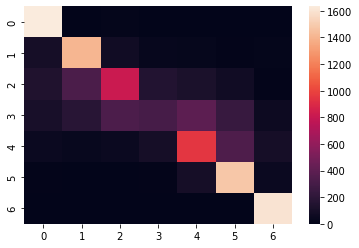

In [72]:
print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))

In [73]:
print('K Nearest Neighbors done!')
logger.add(this_epic, 'KNN', knn.score(X_test, y_test))

K Nearest Neighbors done!


### 3. Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))
# log_reg.score

Confusion Matrix:
[[1634    3   16    3    3    0    0]
 [  94 1410   75   31   21    7   14]
 [ 139  320  813  152  116   73   12]
 [ 105  174  329  303  395  237   56]
 [  51   37   45   95  949  335   93]
 [   9    0    2   12   91 1478   51]
 [   0    0    0    0    0    0 1600]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.80      0.98      0.89      1659
         4.0       0.73      0.85      0.78      1652
         5.0       0.64      0.50      0.56      1625
         6.0       0.51      0.19      0.28      1599
         7.0       0.60      0.59      0.60      1605
         8.0       0.69      0.90      0.78      1643
         9.0       0.88      1.00      0.93      1600

    accuracy                           0.72     11383
   macro avg       0.69      0.72      0.69     11383
weighted avg       0.69      0.72      0.69     11383



In [76]:
# Check all LogisticRegression hyperparameters

# Get the default parameters
default_parameters = DecisionTreeClassifier().get_params()


# Print the default parameters
print('Parameter             Value')
print('-'*30)
for parameter, value in default_parameters.items():
    print(f"{parameter:20}: {value}")
    

Parameter             Value
------------------------------
ccp_alpha           : 0.0
class_weight        : None
criterion           : gini
max_depth           : None
max_features        : None
max_leaf_nodes      : None
min_impurity_decrease: 0.0
min_samples_leaf    : 1
min_samples_split   : 2
min_weight_fraction_leaf: 0.0
random_state        : None
splitter            : best


In [77]:
# Define the hyperparameter grid
hyperparameter_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 20, 50],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

In [78]:
# C A U T I O N !!!     1min process ahead

# Run the model with all the parameter combinations
grid_search = GridSearchCV(dtree, hyperparameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best;, score=0.421 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best;, score=0.401 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best;, score=0.402 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best;, score=0.425 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=best;, score=0.417 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random;, score=0.316 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random;, score=0.314 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=2, splitter=random;, score=0.317 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_sampl

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'splitter': ['best', 'random']},
             verbose=3)

* Train the model with the best hyper parameters

In [79]:
# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)
print(grid_search.best_score_)

# Train the model with the best hyperparameters
dtree.set_params(**best_hyperparameters)


{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2, 'splitter': 'best'}
0.6408417402269861


DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [80]:
dtree.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
y_pred = dtree.predict(X_test)
# accuracy = np.mean(y_pred == y_test)

# print('Accuracy:', accuracy)

print ('Score', dtree.score(X_test, y_test))

Score 0.6718791179829571


Confusion Matrix:
[[1509   41   76   13    9   11    0]
 [  80 1212  182  109   54   15    0]
 [  84  315  846  240  108   32    0]
 [  83  135  459  421  351  147    3]
 [  27   34  151  277  878  237    1]
 [  10   17   49   94  275 1187   11]
 [   0    0    0    0    2    3 1595]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.84      0.91      0.87      1659
         4.0       0.69      0.73      0.71      1652
         5.0       0.48      0.52      0.50      1625
         6.0       0.36      0.26      0.31      1599
         7.0       0.52      0.55      0.54      1605
         8.0       0.73      0.72      0.72      1643
         9.0       0.99      1.00      0.99      1600

    accuracy                           0.67     11383
   macro avg       0.66      0.67      0.66     11383
weighted avg       0.66      0.67      0.66     11383



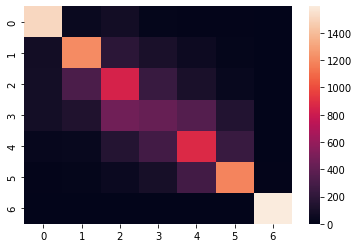

In [81]:
print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))

In [82]:
print('Decision Tree done!')
logger.add(this_epic, 'DecisionTree', dtree.score(X_test, y_test))

Decision Tree done!


### 4. Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))
# log_reg.score

Confusion Matrix:
[[1641    0   12    4    2    0    0]
 [  28 1507   58   41   17    1    0]
 [  37  157 1068  284   72    7    0]
 [  23   81  422  647  344   80    2]
 [   2    8   48  206 1243   97    1]
 [   0    0    4   19   96 1517    7]
 [   0    1    0    0    0    1 1598]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.95      0.99      0.97      1659
         4.0       0.86      0.91      0.88      1652
         5.0       0.66      0.66      0.66      1625
         6.0       0.54      0.40      0.46      1599
         7.0       0.70      0.77      0.74      1605
         8.0       0.89      0.92      0.91      1643
         9.0       0.99      1.00      1.00      1600

    accuracy                           0.81     11383
   macro avg       0.80      0.81      0.80     11383
weighted avg       0.80      0.81      0.80     11383



In [85]:
# Check all LogisticRegression hyperparameters

# Get the default parameters
default_parameters = RandomForestClassifier().get_params()


# Print the default parameters
print('Parameter             Value')
print('-'*30)
for parameter, value in default_parameters.items():
    print(f"{parameter:20}: {value}")
    

Parameter             Value
------------------------------
bootstrap           : True
ccp_alpha           : 0.0
class_weight        : None
criterion           : gini
max_depth           : None
max_features        : sqrt
max_leaf_nodes      : None
max_samples         : None
min_impurity_decrease: 0.0
min_samples_leaf    : 1
min_samples_split   : 2
min_weight_fraction_leaf: 0.0
n_estimators        : 100
n_jobs              : None
oob_score           : False
random_state        : None
verbose             : 0
warm_start          : False


In [86]:
# Define the hyperparameter grid
hyperparameter_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'n_estimators': [1000],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 20, 50],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
}

In [87]:
# C A U T I O N !!!     45 min process ahead

# Run the model with all the parameter combinations
grid_search = GridSearchCV(rforest, hyperparameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=3, min_samples_split=2, n_estimators=1000;, score=0.467 total time=   4.3s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=3, min_samples_split=2, n_estimators=1000;, score=0.450 total time=   4.4s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=3, min_samples_split=2, n_estimators=1000;, score=0.459 total time=   4.3s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=3, min_samples_split=2, n_estimators=1000;, score=0.466 total time=   4.5s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=3, min_samples_split=2, n_estimators=1000;, score=0.457 total time=   4.2s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=3, min_samples_split=5, n_estimators=1000;, score=0.467 total time=   4.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=3, min_samples_split=5, n_estimators=1000;, score=0.444 total time=   4.3s
[CV 3/5] END bootstrap=True

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'n_estimators': [1000]},
             verbose=3)

* Train the model with the best hyper parameters

In [88]:
# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)
print(grid_search.best_score_)

# Train the model with the best hyperparameters
best_hyperparameters = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 1000}    # REMOVE!!!!
rforest.set_params(**best_hyperparameters)


{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 1000}
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 1000}
0.784335855401429


RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=1000)

In [89]:
rforest.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
y_pred = rforest.predict(X_test)
# accuracy = np.mean(y_pred == y_test)

# print('Accuracy:', accuracy)

print ('Score', rforest.score(X_test, y_test))


Score 0.7944302907845032


Confusion Matrix:
[[1629    0   21    3    6    0    0]
 [  26 1476  103   32   15    0    0]
 [  37  174 1085  246   73   10    0]
 [  26   84  447  565  381   94    2]
 [   4   13   52  194 1202  138    2]
 [   0    1    3   28  105 1490   16]
 [   0    1    0    0    1    2 1596]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.95      0.98      0.96      1659
         4.0       0.84      0.89      0.87      1652
         5.0       0.63      0.67      0.65      1625
         6.0       0.53      0.35      0.42      1599
         7.0       0.67      0.75      0.71      1605
         8.0       0.86      0.91      0.88      1643
         9.0       0.99      1.00      0.99      1600

    accuracy                           0.79     11383
   macro avg       0.78      0.79      0.78     11383
weighted avg       0.78      0.79      0.79     11383



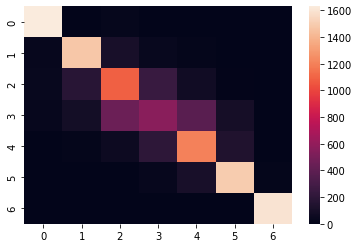

In [90]:
print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))

In [91]:
# Make predictions on the training set using the RandomForestClassifier object
y_pred_train = rforest.predict(X_train)

# Calculate the OOB error
oob_error = np.mean(y_pred_train != y_train)

# Print the OOB error
print('OOB error:', oob_error)

OOB error: 0.016400164001640016


In [92]:
# Here we check bias vs. variance calculating the mean error between trainiing set and test set
trainset_error = oob_error
testset_error = np.mean(y_test != y_pred)
print('Train set error', trainset_error)
print('Test set error', testset_error)

Train set error 0.016400164001640016
Test set error 0.2055697092154968


In [93]:
print('Random Forest done!')
logger.add(this_epic, 'Random Forest', rforest.score(X_test, y_test))

Random Forest done!


### 5. Support Vector Machine (SVM)

In [94]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))
# log_reg.score

Confusion Matrix:
[[1629    0   21    3    6    0    0]
 [  26 1476  103   32   15    0    0]
 [  37  174 1085  246   73   10    0]
 [  26   84  447  565  381   94    2]
 [   4   13   52  194 1202  138    2]
 [   0    1    3   28  105 1490   16]
 [   0    1    0    0    1    2 1596]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.95      0.98      0.96      1659
         4.0       0.84      0.89      0.87      1652
         5.0       0.63      0.67      0.65      1625
         6.0       0.53      0.35      0.42      1599
         7.0       0.67      0.75      0.71      1605
         8.0       0.86      0.91      0.88      1643
         9.0       0.99      1.00      0.99      1600

    accuracy                           0.79     11383
   macro avg       0.78      0.79      0.78     11383
weighted avg       0.78      0.79      0.79     11383



In [96]:
# Check all SVM hyperparameters

# Get the default parameters
default_parameters = SVC().get_params()


# Print the default parameters
print('Parameter             Value')
print('-'*30)
for parameter, value in default_parameters.items():
    print(f"{parameter:20}: {value}")
    

Parameter             Value
------------------------------
C                   : 1.0
break_ties          : False
cache_size          : 200
class_weight        : None
coef0               : 0.0
decision_function_shape: ovr
degree              : 3
gamma               : scale
kernel              : rbf
max_iter            : -1
probability         : False
random_state        : None
shrinking           : True
tol                 : 0.001
verbose             : False


In [97]:
# Define the hyperparameter grid
hyperparameter_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 'scale'],
}

In [98]:
# C A U T I O N !!!     6 min process ahead

# Run the model with all the parameter combinations
grid_search = GridSearchCV(svm, hyperparameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.506 total time=   0.9s
[CV 2/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.507 total time=   1.7s
[CV 3/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.496 total time=   1.6s
[CV 4/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.497 total time=   1.7s
[CV 5/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.494 total time=   1.7s
[CV 1/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.312 total time=   3.2s
[CV 2/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.297 total time=   3.2s
[CV 3/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.295 total time=   3.2s
[CV 4/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.304 total time=   3.1s
[CV 5/5] END ....C=0.01, gamma=auto, kernel=rbf;, score=0.306 total time=   3.3s
[CV 1/5] END C=0.01, gamma=scale, kernel=linear;, score=0.506 total time=   1.7s
[CV 2/5] END C=0.01, gamma=scale, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

* Train the model with the best hyper parameters

In [99]:
# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)

# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)
print(grid_search.best_score_)

# Train the model with the best hyperparameters   (CHANGE THE ESTIMATOR)
svm.set_params(**best_hyperparameters)


{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.7703928121059269


SVC(C=100)

In [100]:
svm.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
y_pred = svm.predict(X_test)
# accuracy = np.mean(y_pred == y_test)

# print('Accuracy:', accuracy)

print ('Score',svm.score(X_test, y_test))


Score 0.7885443204779057


Confusion Matrix:
[[1659    0    0    0    0    0    0]
 [  21 1524   59   37    7    4    0]
 [  33  198  974  319   83   18    0]
 [  25  105  469  548  364   86    2]
 [   9   20   65  190 1177  144    0]
 [   0    0    2   32  115 1494    0]
 [   0    0    0    0    0    0 1600]]
Classification Report:
              precision    recall  f1-score   support

         3.0       0.95      1.00      0.97      1659
         4.0       0.83      0.92      0.87      1652
         5.0       0.62      0.60      0.61      1625
         6.0       0.49      0.34      0.40      1599
         7.0       0.67      0.73      0.70      1605
         8.0       0.86      0.91      0.88      1643
         9.0       1.00      1.00      1.00      1600

    accuracy                           0.79     11383
   macro avg       0.77      0.79      0.78     11383
weighted avg       0.77      0.79      0.78     11383



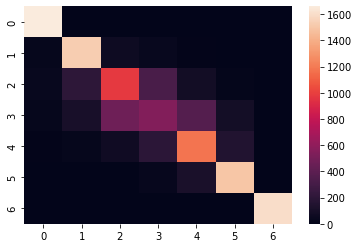

In [101]:
print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))

In [102]:
# Make predictions on the training set using the RandomForestClassifier object
y_pred_train = rforest.predict(X_train)

# Calculate the OOB error
oob_error = np.mean(y_pred_train != y_train)

# Print the OOB error
print('OOB error:', oob_error)

OOB error: 0.016400164001640016


In [103]:
# Here we check bias vs. variance calculating the mean error between trainiing set and test set
trainset_error = oob_error
testset_error = np.mean(y_test != y_pred)
print('Train set error', trainset_error)
print('Test set error', testset_error)

Train set error 0.016400164001640016
Test set error 0.21145567952209435


In [104]:
print('Support Vector Machine done!')
logger.add(this_epic, 'SVM', svm.score(X_test, y_test))

Support Vector Machine done!


### 6. XGBoost

In [105]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the class labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

xgb_model = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.1,
              max_depth = 1, n_estimators = 330)

xgb_model.fit(X_train, y_train_encoded)
y_pred = xgb_model.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:') 

print(confusion_matrix(y_test, y_pred))
print('Classification Report:') 
print(classification_report(y_test, y_pred, zero_division=0))


Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [1068  224  177  112   29   22   27    0    0    0]
 [ 227  894  292  123   68   47    1    0    0    0]
 [ 126  286  839  221  112   41    0    0    0    0]
 [  90  136  404  400  363  186   20    0    0    0]
 [  56   55   83  203  691  484   33    0    0    0]
 [  19   25   40   89  488  934   48    0    0    0]
 [   1    0    0    0    0    0 1599    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.10      0.07      0.08      1659
         4.0       0.04      0.04      0.04      1652
         5.0       0.02      0.03      0.02      1625
         6.0       0.01      0.01      0.01      

In [107]:
# Check all XGBoost hyperparameters

# Get the default parameters
default_parameters = XGBClassifier().get_params()


# Print the default parameters
print('Parameter             Value')
print('-'*30)
for parameter, value in default_parameters.items():
    print(f"{parameter:20}: {value}")
    

Parameter             Value
------------------------------
objective           : binary:logistic
base_score          : None
booster             : None
callbacks           : None
colsample_bylevel   : None
colsample_bynode    : None
colsample_bytree    : None
device              : None
early_stopping_rounds: None
enable_categorical  : False
eval_metric         : None
feature_types       : None
gamma               : None
grow_policy         : None
importance_type     : None
interaction_constraints: None
learning_rate       : None
max_bin             : None
max_cat_threshold   : None
max_cat_to_onehot   : None
max_delta_step      : None
max_depth           : None
max_leaves          : None
min_child_weight    : None
missing             : nan
monotone_constraints: None
multi_strategy      : None
n_estimators        : None
n_jobs              : None
num_parallel_tree   : None
random_state        : None
reg_alpha           : None
reg_lambda          : None
sampling_method     : None
scale_po

In [108]:
# Define the hyperparameter grid
hyperparameter_grid = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
}

In [109]:

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid, cv=5, verbose=3)
random_search.fit(X_train, y_train_encoded)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.775 total time=   7.3s
[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.777 total time=   7.1s
[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.793 total time=   7.8s
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.778 total time=  10.9s
[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.797 total time=   3.3s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.772 total time=   3.5s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.770 total time=   2.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.786 total time=   3.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.752 total time=   2.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.771 total ti

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=1,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=330, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [200, 300]},
                   verbose=3)

In [110]:
# C A U T I O N !!!     6 min process ahead

# Run the model with all the parameter combinations
grid_search = GridSearchCV(xgb_model, hyperparameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train_encoded)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.548 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.559 total time=   2.8s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.562 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.543 total time=   1.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.563 total time=   1.7s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.567 total time=   4.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.577 total time=   2.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.579 total time=   2.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.568 total time=   1.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.58

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=1,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=330,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [200, 300]},
             verbose=3)

* Train the model with the best hyper parameters

In [111]:
# Get the best hyperparameters
best_hyperparameters = grid_search.best_params_
print(best_hyperparameters)

# Get the best hyperparameters
best_random_hyperparameters = random_search.best_params_
best_grid_hyperparameters    = grid_search.best_params_
print('RandomizedSearch')
print(random_search.best_score_)
print(best_random_hyperparameters)
print('GridSearch')
print(best_grid_hyperparameters)
print(grid_search.best_score_)

# Train the model with the best hyperparameters   (CHANGE THE ESTIMATOR)
xgb_model.set_params(**best_grid_hyperparameters)


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
RandomizedSearch
0.7886437578814627
{'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
GridSearch
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
0.7886437578814627


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [112]:
xgb_model.fit(X_train, y_train_encoded)

# Evaluate the accuracy of the model on the test set
y_pred = xgb_model.predict(X_test)
# accuracy = np.mean(y_pred == y_test)

# print('Accuracy:', accuracy)

print ('Score',xgb_model.score(X_test, y_test_encoded))

Score 0.8063779320038654


Confusion Matrix:
[[1629    0   25    2    1    2    0]
 [  21 1447   99   68   16    1    0]
 [  29  129 1019  365   74    9    0]
 [  17   47  388  752  330   59    6]
 [   3   13   48  209 1223  102    7]
 [   0    1    4   23   99 1510    6]
 [   0    0    0    1    0    0 1599]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1659
           1       0.88      0.88      0.88      1652
           2       0.64      0.63      0.64      1625
           3       0.53      0.47      0.50      1599
           4       0.70      0.76      0.73      1605
           5       0.90      0.92      0.91      1643
           6       0.99      1.00      0.99      1600

    accuracy                           0.81     11383
   macro avg       0.80      0.81      0.80     11383
weighted avg       0.80      0.81      0.80     11383



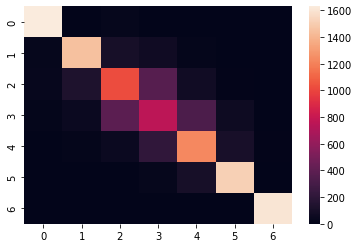

In [113]:
print('Confusion Matrix:') 

print(confusion_matrix(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred))
print('Classification Report:') 
print(classification_report(y_test_encoded, y_pred, zero_division=0))

In [114]:
# Make predictions on the training set using the RandomForestClassifier object
y_pred_train = xgb_model.predict(X_train)

# Calculate the OOB error
oob_error = np.mean(y_pred_train != y_train_encoded)

# Print the OOB error
print('OOB error:', oob_error)

OOB error: 0.0


In [115]:
# Here we check bias vs. variance calculating the mean error between trainiing set and test set
trainset_error = oob_error
testset_error = np.mean(y_test_encoded != y_pred)
print('Train set error', trainset_error)
print('Test set error', testset_error)

Train set error 0.0
Test set error 0.1936220679961346


In [116]:
# Make predictions on the test data
y_pred_encoded = xgb_model.predict(X_test)

# Decode the class labels
y_pred = le.inverse_transform(y_pred_encoded)

In [117]:
print('XGBoost done!')
logger.add(this_epic, 'XGBoost', xgb_model.score(X_test, y_test_encoded))

XGBoost done!


In [118]:
logger.df

,Model,Score,Timestamp,Epic
0,LogisticRegression,0.510410,2023-12-26 17:22:43.954401,Full dataset with Oversampling
1,KNN,0.719230,2023-12-26 17:27:47.360106,Full dataset with Oversampling
2,DecisionTree,0.671879,2023-12-26 17:33:17.539576,Full dataset with Oversampling
3,Random Forest,0.794430,2023-12-26 19:17:35.190072,Full dataset with Oversampling
4,SVM,0.788544,2023-12-26 19:27:41.985469,Full dataset with Oversampling
5,XGBoost,0.806378,2023-12-26 19:39:19.399576,Full dataset with Oversampling


### 7. Final Tuning for the winner model = XGBoost

In [119]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the class labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

xgb_model = xgb.XGBClassifier(early_stopping_rounds=10)


xgb_model.fit(X_train, y_train_encoded, eval_set=[(X_test, y_test_encoded)])
y_pred = xgb_model.predict(X_test)



[0]	validation_0-mlogloss:1.59889
[1]	validation_0-mlogloss:1.39614
[2]	validation_0-mlogloss:1.26830
[3]	validation_0-mlogloss:1.17467
[4]	validation_0-mlogloss:1.10035
[5]	validation_0-mlogloss:1.04445
[6]	validation_0-mlogloss:0.99771
[7]	validation_0-mlogloss:0.95525
[8]	validation_0-mlogloss:0.92136
[9]	validation_0-mlogloss:0.89371
[10]	validation_0-mlogloss:0.86973
[11]	validation_0-mlogloss:0.84589
[12]	validation_0-mlogloss:0.82520
[13]	validation_0-mlogloss:0.80478
[14]	validation_0-mlogloss:0.78841
[15]	validation_0-mlogloss:0.77459
[16]	validation_0-mlogloss:0.76166
[17]	validation_0-mlogloss:0.74859
[18]	validation_0-mlogloss:0.73763
[19]	validation_0-mlogloss:0.72657
[20]	validation_0-mlogloss:0.71804
[21]	validation_0-mlogloss:0.70676
[22]	validation_0-mlogloss:0.69837
[23]	validation_0-mlogloss:0.69138
[24]	validation_0-mlogloss:0.68308
[25]	validation_0-mlogloss:0.67392
[26]	validation_0-mlogloss:0.66849
[27]	validation_0-mlogloss:0.66122
[28]	validation_0-mlogloss:0.6

In [120]:
# Check all XGBoost hyperparameters

# Get the default parameters
default_parameters = XGBClassifier().get_params()


# Print the default parameters
print('Parameter             Value')
print('-'*30)
for parameter, value in default_parameters.items():
    print(f"{parameter:20}: {value}")
    

Parameter             Value
------------------------------
objective           : binary:logistic
base_score          : None
booster             : None
callbacks           : None
colsample_bylevel   : None
colsample_bynode    : None
colsample_bytree    : None
device              : None
early_stopping_rounds: None
enable_categorical  : False
eval_metric         : None
feature_types       : None
gamma               : None
grow_policy         : None
importance_type     : None
interaction_constraints: None
learning_rate       : None
max_bin             : None
max_cat_threshold   : None
max_cat_to_onehot   : None
max_delta_step      : None
max_depth           : None
max_leaves          : None
min_child_weight    : None
missing             : nan
monotone_constraints: None
multi_strategy      : None
n_estimators        : None
n_jobs              : None
num_parallel_tree   : None
random_state        : None
reg_alpha           : None
reg_lambda          : None
sampling_method     : None
scale_po

In [121]:
# Define the hyperparameter grid
hyperparameter_grid = {
    'n_estimators': [300],
    'max_depth': [7],
    'min_child_weight': [1, 2],
    'early_stopping_rounds': [10, 20],
    'learning_rate': [0.3],
}

# GridSearch
# {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
# 0.7797805560613957

In [122]:
# C A U T I O N !!!     6 min process ahead

# Run the model with all the parameter combinations
grid_search = GridSearchCV(xgb_model, hyperparameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train_encoded, eval_set=[(X_test, y_test_encoded)])



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[0]	validation_0-mlogloss:1.57126
[1]	validation_0-mlogloss:1.36576
[2]	validation_0-mlogloss:1.23771
[3]	validation_0-mlogloss:1.13768
[4]	validation_0-mlogloss:1.06263
[5]	validation_0-mlogloss:0.99999
[6]	validation_0-mlogloss:0.95296
[7]	validation_0-mlogloss:0.91008
[8]	validation_0-mlogloss:0.87544
[9]	validation_0-mlogloss:0.84428
[10]	validation_0-mlogloss:0.82191
[11]	validation_0-mlogloss:0.80366
[12]	validation_0-mlogloss:0.78563
[13]	validation_0-mlogloss:0.76741
[14]	validation_0-mlogloss:0.75401
[15]	validation_0-mlogloss:0.74013
[16]	validation_0-mlogloss:0.72544
[17]	validation_0-mlogloss:0.71266
[18]	validation_0-mlogloss:0.70080
[19]	validation_0-mlogloss:0.69205
[20]	validation_0-mlogloss:0.68503
[21]	validation_0-mlogloss:0.67358
[22]	validation_0-mlogloss:0.66563
[23]	validation_0-mlogloss:0.65992
[24]	validation_0-mlogloss:0.65395
[25]	validation_0-mlogloss:0.64840
[26]	validation_0-mlogloss:0.64440
[27]	

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, ma...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'early_stopping_rounds': [10, 20],
                         'learning_rate': [0.3], 'max_depth': [7],
                         'min_child_weight': [1, 2], 'n_estimators': [300]},
             verbose=3)

* Train the model with the best hyper parameters

In [123]:

# Get the best hyperparameters
best_grid_hyperparameters    = grid_search.best_params_

print('GridSearch')
print(best_grid_hyperparameters)
print(grid_search.best_score_)

# Train the model with the best hyperparameters   (CHANGE THE ESTIMATOR)
xgb_model.set_params(**best_grid_hyperparameters)


GridSearch
{'early_stopping_rounds': 10, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}
0.7841334594367382


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [156]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from scipy.sparse import vstack

# reproducibility
seed = 101
np.random.seed(seed)

y_encoded = pd.concat([pd.DataFrame(y_train_encoded), pd.DataFrame(y_test_encoded)])
print('y_train_encoded: ', len(y_train_encoded))
print('y_test_encoded: ', len(y_train_encoded))
print('y_encoded: ', len(y_train_encoded))
y_encoded.describe()

y_train_encoded:  4878
y_test_encoded:  4878
y_encoded:  4878


,0
count,16261.000000
mean,3.012668
std,2.012162
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [157]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


In [158]:
# Define the hyperparameter grid
default_params = {
    # 'objective': 'binary:logistic',
    'max_depth': 7,
    'min_child_weight': 2,
    'learning_rate': 0.3,
}

n_estimators_range = np.linspace(1, 200, 10).astype('int')

train_scores, test_scores = validation_curve(
    XGBClassifier(**default_params),
    X, y_encoded,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv,
    scoring='accuracy', 
    verbose=3
)


[CV] END ....n_estimators=1;, score=(train=0.250, test=0.148) total time=   0.1s
[CV] END ...n_estimators=23;, score=(train=0.538, test=0.140) total time=   0.9s
[CV] END ...n_estimators=45;, score=(train=0.671, test=0.143) total time=   1.5s
[CV] END ...n_estimators=67;, score=(train=0.750, test=0.135) total time=   2.4s
[CV] END ...n_estimators=89;, score=(train=0.804, test=0.139) total time=   3.4s
[CV] END ..n_estimators=111;, score=(train=0.844, test=0.138) total time=   3.7s
[CV] END ..n_estimators=133;, score=(train=0.869, test=0.147) total time=   4.9s
[CV] END ..n_estimators=155;, score=(train=0.888, test=0.140) total time=   3.7s
[CV] END ..n_estimators=177;, score=(train=0.901, test=0.140) total time=   3.4s
[CV] END ..n_estimators=200;, score=(train=0.911, test=0.138) total time=   6.4s
[CV] END ....n_estimators=1;, score=(train=0.233, test=0.138) total time=   0.1s
[CV] END ...n_estimators=23;, score=(train=0.547, test=0.153) total time=   0.7s
[CV] END ...n_estimators=45;

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  1.8min


[CV] END ...n_estimators=23;, score=(train=0.536, test=0.144) total time=   0.9s
[CV] END ...n_estimators=45;, score=(train=0.674, test=0.148) total time=   1.8s
[CV] END ...n_estimators=67;, score=(train=0.750, test=0.158) total time=   2.4s
[CV] END ...n_estimators=89;, score=(train=0.808, test=0.149) total time=   3.3s
[CV] END ..n_estimators=111;, score=(train=0.840, test=0.148) total time=   3.7s
[CV] END ..n_estimators=133;, score=(train=0.864, test=0.149) total time=   4.3s
[CV] END ..n_estimators=155;, score=(train=0.882, test=0.145) total time=   6.3s
[CV] END ..n_estimators=177;, score=(train=0.895, test=0.142) total time=   6.6s
[CV] END ..n_estimators=200;, score=(train=0.904, test=0.145) total time=   5.6s
[CV] END ....n_estimators=1;, score=(train=0.228, test=0.150) total time=   0.1s
[CV] END ...n_estimators=23;, score=(train=0.530, test=0.132) total time=   0.9s
[CV] END ...n_estimators=45;, score=(train=0.666, test=0.136) total time=   1.8s
[CV] END ...n_estimators=67;

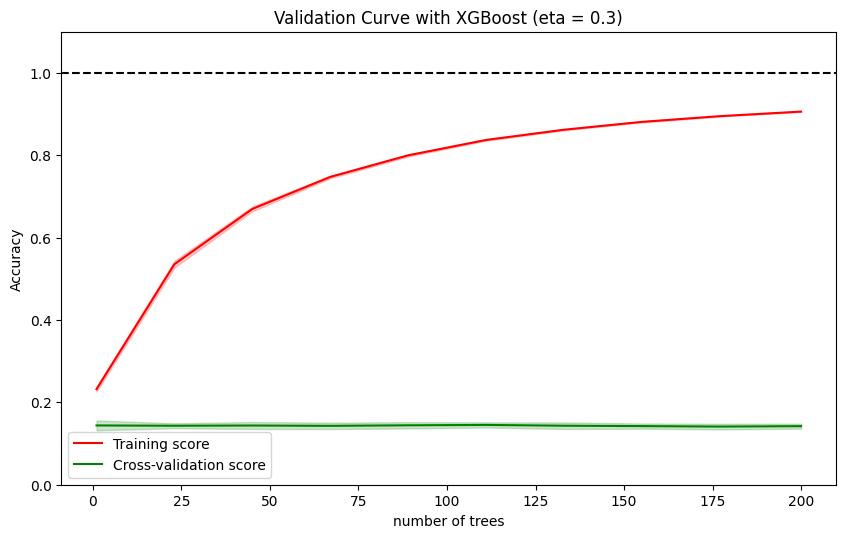

Best cross-validation result (0.15) obtained for 111 trees


In [128]:
# Show the validation curve plot

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean,
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

#### Manually check if the prediction rates are true

In [150]:

y_pred_train_df = pd.DataFrame(y_pred_train, columns=['y_pred_train'])
out_train_df = pd.concat([X_train, y_train, y_pred_train_df], ignore_index=True, sort=False, axis=1)
out_train_df.columns = X_train.columns.to_list() + ['y_train'] + ['y_pred_train']
out_train_df
y_pred_df = pd.DataFrame(y_pred, columns=['y_pred'])
type(X_test), type(y_test), type(y_pred_df)

out_test_df = pd.concat([X_test, pd.Series(y_test), y_pred_df], ignore_index=True, sort=False, axis=1)
out_test_df.columns = X_test.columns.to_list() + ['y_test'] + ['y_pred']
out_test_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white,y_test,y_pred
16142,0.386423,-0.146420,0.295704,0.133745,-0.797328,-0.237962,-0.203593,-0.532019,0.566396,0.061030,0.801717,0.585743,NaN,NaN
2584,-1.072473,0.272660,1.029645,0.544812,-0.805479,-1.013103,-0.459918,-1.293425,0.968648,-0.556721,2.910015,0.585743,6.0,6.0
4932,0.064281,0.332102,-0.125689,-0.744146,0.632399,0.166449,-0.618455,0.797477,1.155723,0.779027,-0.884822,-1.707233,7.0,7.0
2557,-0.541988,-0.618963,0.485959,2.722708,-0.127235,-0.451412,0.209463,1.465217,-0.715020,-0.423146,-1.137811,0.585743,9.0,9.0
5609,-0.229588,2.934551,-1.956478,-0.698341,0.415006,-1.071971,-1.568143,0.619210,1.499374,0.456465,-0.579909,-1.707233,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
11373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
11375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
11379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0


In [151]:

y_pred_df = pd.DataFrame(y_pred, columns=['y_pred'])
out_test_df = pd.concat([X_test, pd.Series(y_test), y_pred_df], ignore_index=True, sort=False, axis=1)
out_test_df.columns = X_test.columns.to_list() + ['y_test'] + ['y_pred']
out_test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white,y_test,y_pred
16142,0.386423,-0.146420,0.295704,0.133745,-0.797328,-0.237962,-0.203593,-0.532019,0.566396,0.061030,0.801717,0.585743,NaN,NaN
2584,-1.072473,0.272660,1.029645,0.544812,-0.805479,-1.013103,-0.459918,-1.293425,0.968648,-0.556721,2.910015,0.585743,6.0,6.0
4932,0.064281,0.332102,-0.125689,-0.744146,0.632399,0.166449,-0.618455,0.797477,1.155723,0.779027,-0.884822,-1.707233,7.0,7.0
2557,-0.541988,-0.618963,0.485959,2.722708,-0.127235,-0.451412,0.209463,1.465217,-0.715020,-0.423146,-1.137811,0.585743,9.0,9.0
5609,-0.229588,2.934551,-1.956478,-0.698341,0.415006,-1.071971,-1.568143,0.619210,1.499374,0.456465,-0.579909,-1.707233,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
11373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
11375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
11379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0


In [152]:
out_train_df.to_excel('out_train.xlsx', sheet_name='Training', index=False)
out_test_df.to_excel('out_test.xlsx', sheet_name='Test', index=False)

In [ ]:
# Saving the model

xgb_model.save_model('xgb_model.json')